<a href="https://colab.research.google.com/github/meetgandhi123/Deep-Learning-101/blob/master/BlackFridayNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!unzip "/content/drive/My Drive/Deep Learning/Datasets/black-friday.zip"

Archive:  /content/drive/My Drive/Deep Learning/Datasets/black-friday.zip
  inflating: test.csv                
  inflating: train.csv               


In [3]:
"""
Check no of columns
input tensor=#col
batch size of 10
"""

'\nCheck no of columns\ninput tensor=#col\nbatch size of 10\n'

In [0]:
import numpy as np
import pandas as pd

In [0]:
train=pd.read_csv("/content/train.csv")
test=pd.read_csv("/content/test.csv")

In [0]:
#train.head()

In [0]:
#train.info()

In [0]:
train=train.fillna(0)
test=test.fillna(0)

In [0]:
#train.nunique()

In [0]:
for col in ['Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years','Marital_Status']:
    train[col] = train[col].astype('category')
    test[col] = test[col].astype('category')

In [0]:
#train.info()

In [0]:
train_ID=train[['User_ID','Product_ID']]
test_ID=test[['User_ID','Product_ID']]

In [0]:
train=train.drop(['User_ID','Product_ID'],axis=1)
test=test.drop(['User_ID','Product_ID'],axis=1)

In [0]:
#train_ID.shape

In [0]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [0]:
train.shape
head_train=train.columns
head_test=test.columns

In [0]:
#head_train

In [52]:
mul=max(train['Purchase'])
print(mul)

23961


In [0]:
#NORMALIZE THE DATA
def Norm(df):
  from sklearn import preprocessing
  x = df.values #returns a numpy array
  min_max_scaler = preprocessing.MinMaxScaler()
  x_scaled = min_max_scaler.fit_transform(x)
  df = pd.DataFrame(x_scaled)
  return df

In [0]:
train=Norm(train)
test=Norm(test)

In [0]:
train.columns = head_train
test.columns = head_test

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 44 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Product_Category_1             550068 non-null  float64
 1   Product_Category_2             550068 non-null  float64
 2   Product_Category_3             550068 non-null  float64
 3   Purchase                       550068 non-null  float64
 4   Gender_F                       550068 non-null  float64
 5   Gender_M                       550068 non-null  float64
 6   Age_0-17                       550068 non-null  float64
 7   Age_18-25                      550068 non-null  float64
 8   Age_26-35                      550068 non-null  float64
 9   Age_36-45                      550068 non-null  float64
 10  Age_46-50                      550068 non-null  float64
 11  Age_51-55                      550068 non-null  float64
 12  Age_55+                       

In [0]:
#train=pd.concat([train,train_ID],axis=1)
#test=pd.concat([test,test_ID],axis=1)

In [58]:
train.head()

,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,Occupation_10,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Marital_Status_0,Marital_Status_1
0,0.105263,0.000000,0.000000,0.348992,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.000000,0.333333,0.777778,0.634181,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.578947,0.000000,0.000000,0.058875,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.578947,0.777778,0.000000,0.043634,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.368421,0.000000,0.000000,0.332248,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [0]:
#print(train['Purchase'])
train_y=train['Purchase']
train_x=train.drop(['Purchase'],axis=1)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.20)

In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [62]:
model = Sequential()
model.add(Dense(32, input_dim=43, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                1408      
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 5         
Total params: 2,113
Trainable params: 2,113
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [75]:
model.fit(X_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
440054/440054 [==============================] - 185s 420us/step - loss: 0.0259 - mean_squared_error: 0.0259
Epoch 2/10
440054/440054 [==============================] - 183s 416us/step - loss: 0.0178 - mean_squared_error: 0.0178
Epoch 3/10
440054/440054 [==============================] - 184s 418us/step - loss: 0.0164 - mean_squared_error: 0.0164
Epoch 4/10
440054/440054 [==============================] - 185s 420us/step - loss: 0.0162 - mean_squared_error: 0.0162
Epoch 5/10
440054/440054 [==============================] - 183s 415us/step - loss: 0.0161 - mean_squared_error: 0.0161
Epoch 6/10
440054/440054 [==============================] - 185s 420us/step - loss: 0.0160 - mean_squared_error: 0.0160
Epoch 7/10
440054/440054 [==============================] - 183s 416us/step - loss: 0.0159 - mean_squared_error: 0.0159
Epoch 8/10
440054/440054 [==============================] - 184s 418us/step - loss: 0.0159 - mean_squared_error: 0.0159
Epoch 9/10
440054/440054 [==============

In [77]:
from sklearn.metrics import mean_squared_error
pred= model.predict(X_val)
score = np.sqrt(mean_squared_error(y_val*mul,pred*mul))
print (score)

2996.953124052592


In [0]:
def accuracy(y_pred,y_test):
    from sklearn import metrics
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    print("MAE",metrics.mean_absolute_error(y_test,y_pred))
    print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))    # using heatmap to plot accuracy
    plt.scatter(y_test,y_pred)
    plt.xlabel('predicted values')
    plt.ylabel('true values')
    plt.show()

In [70]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=100,random_state=0)
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

Random Forest
MAE 2210.5104156747348
RMSE 3035.10440771047


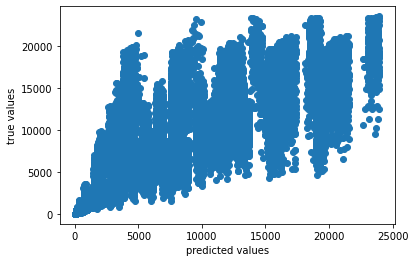

In [74]:
y_pred_randf=regressor.predict(X_val)

print("Random Forest")
accuracy(y_pred_randf*mul,y_val*mul)

In [72]:
print(y_val)

16074     0.655810
245947    0.369326
295786    0.179047
62115     0.401353
529494    0.644954
            ...   
346613    0.478934
483654    0.491252
188917    0.635392
68560     0.857948
353154    0.483527
Name: Purchase, Length: 110014, dtype: float64
